##  Task 1: IRIS FLOWER CLASSIFICATION

### IMPORT LIBRARIES

In [9]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore")

### IMPORT DATASET

In [10]:
iris=pd.read_csv(r"C:\Users\NEHA\Downloads\IRIS.csv")

In [11]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
#Checking the description of the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
iris=iris.drop(columns="Id")

In [16]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
iris.shape

(150, 5)

In [18]:
iris.size

750

In [19]:
columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

### DATA VISUALIZATION

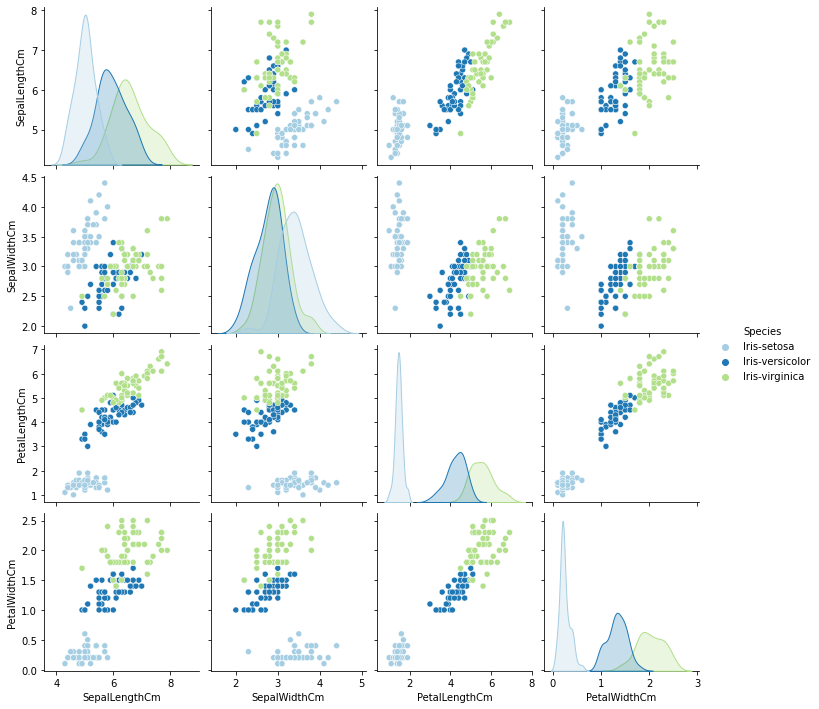

In [20]:
sns.pairplot(iris, hue='Species',palette='Paired')

<AxesSubplot:xlabel='Species', ylabel='count'>

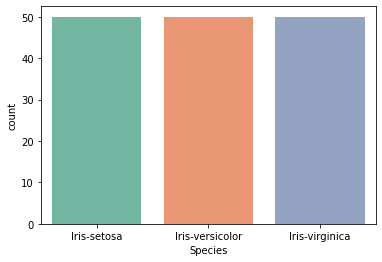

In [21]:
sns.countplot(x ='Species', data = iris,palette='Set2')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

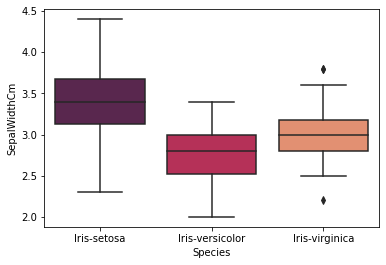

In [22]:
sns.boxplot(x='Species',y='SepalWidthCm',data=iris,palette='rocket')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

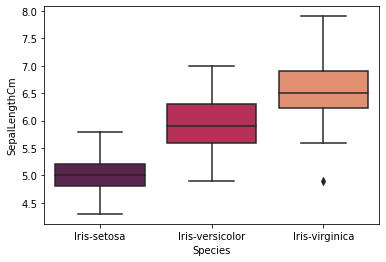

In [23]:
sns.boxplot(x='Species',y='SepalLengthCm',data=iris,palette='rocket')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

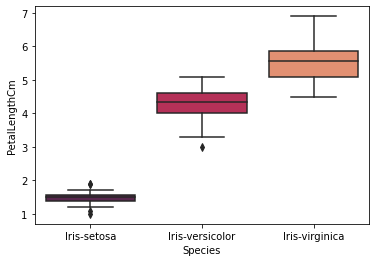

In [24]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris,palette='rocket')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

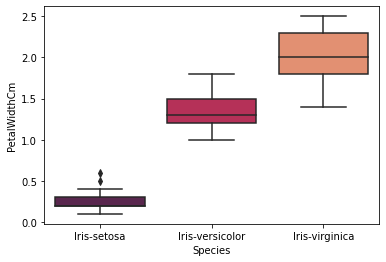

In [25]:
sns.boxplot(x='Species',y='PetalWidthCm',data=iris,palette='rocket')

In [26]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Correlation On Iris Classes')

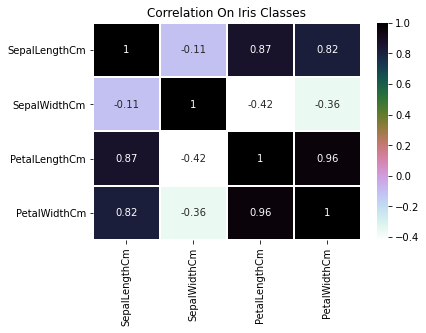

In [27]:
sns.heatmap(iris.corr(),cmap="cubehelix_r", linecolor='white', linewidths=1,annot=True)
plt.title('Correlation On Iris Classes')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

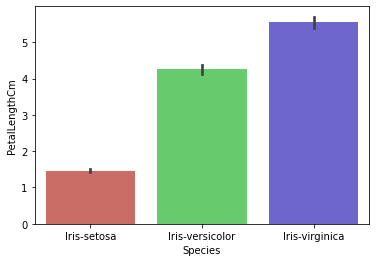

In [28]:
sns.barplot(x ='Species',y='PetalLengthCm',data = iris,palette='hls')

In [29]:
x=iris.drop(['Species'],axis=1)

In [30]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y=iris['Species']

In [32]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### MODEL TRAINING

In [33]:
data=iris.values
X = data[:,0:4]
y = data[:,4]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=1)

In [35]:
x_test.size

212

In [36]:
x_train.size

388

In [37]:
y_train.size

97

In [38]:
y_test.size

53

### MODEL EVALUATION

In [39]:
svn=SVC()
svn.fit(x_train,y_train)

SVC()

In [40]:
prediction=svn.predict(x_test)

In [177]:
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'

In [178]:
confusion_matrix(y_test,prediction)

array([[19,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]], dtype=int64)

In [179]:
accuracy=accuracy_score(y_test,prediction)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 98.11


In [180]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.95      0.97        19
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53



### TESTING THE MODEL

In [181]:
x_new = np.array([[3, 4, 1, 0.3], [  4.5, 2.1, 3.8, 1.1 ], [  5.3, 2.4, 4.6, 2.9 ]])


In [182]:
#Prediction of the species from the input vector
prediction = svn.predict(x_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
